<a href="https://colab.research.google.com/github/kaitsidis/ML102/blob/main/ResNET50_adam_224180.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
αυτό είναι για τη σύνσεδη με google drive

In [ ]:
!nvidia-smi

Wed Jan 22 09:01:11 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0              28W /  70W |    135MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# prompt: συνδεση με google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


παρακάτω δημιουργεί 3 φακέλους ανάλογα το λαβελ (0,1,2). για να δουλέψει προσαρμόστε το source_dir και το data αναλόγως της δομής στο drive σας

In [ ]:
import os
import shutil
import pandas as pd

# Διαδρομή όπου βρίσκονται όλα τα αρχεία
#source_dir = '/content/drive/MyDrive/detect-pneumonia-fall-2024-25/train_images/train_images'  # Ο φάκελος που περιέχει όλες τις εικόνες
#destination_dir = '/content/drive/MyDrive/detect-pneumonia-fall-2024-25/train_images/data/train_images'  # Ο βασικός φάκελος με τις κατηγορίες

source_dir = '/content/drive/MyDrive/ML102/train_images'  # Ο φάκελος που περιέχει όλες τις εικόνες
destination_dir = '/content/drive/MyDrive//ML102/train_bycategory_images'  # Ο βασικός φάκελος με τις κατηγορίες


# Καθορισμός κατηγοριών (υποθέτουμε ότι έχετε CSV αρχείο με ετικέτες)
categories = {0: "no_pneumonia", 1: "viral_pneumonia", 2: "bacterial_pneumonia"}
csv_file = "data/labels.csv"  # Αρχείο CSV που περιέχει τις ετικέτες

# Δημιουργία φακέλων για τις κατηγορίες
#for category in categories.values():
#    os.makedirs(os.path.join(destination_dir, category), exist_ok=True)

# Φόρτωση του CSV αρχείου
# Υποθέτουμε ότι το CSV έχει στήλες "filename" και "label"
data = pd.read_csv('/content/drive/MyDrive/ML102/labels_train.csv')


# Μετακίνηση αρχείων στους αντίστοιχους φακέλους
for _, row in data.iterrows():
    file_name = row['file_name']  # Όνομα αρχείου
    label = row['class_id']         # Ετικέτα (0, 1, 2)



    # Ορισμός διαδρομών
    src_path = os.path.join(source_dir, file_name)
    dest_path = os.path.join(destination_dir, categories[label], file_name)

    # Μετακίνηση αρχείου
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
    else:
        print(f"Το αρχείο {file_name} δεν βρέθηκε. Παραλείπεται.")

print("Η οργάνωση ολοκληρώθηκε!")


Το αρχείο img_4358977458434011046.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_5224016757187192130.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_3065202206106254707.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_6304894865561547174.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_3371338542810939877.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_946797649386887230.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_3282952127033205295.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_3090153597350897926.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_4875755942606271156.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_4787814488043878610.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_4125543106305495129.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_2823915539277173272.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_7230268662919234934.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_6848561975587852457.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_920571004437917321.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_5530061828133

εδω κάνει κανονικοποίηση στις εικόνες και τις χωρίζει σε training και validation. θέλει προσαρμογή το data_dir

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Ορισμός διαδρομής δεδομένων
#data_dir = '/content/drive/MyDrive/ML102/test_images'  # Βασικός φάκελος με τα δεδομένα
data_dir = '/content/drive/MyDrive//ML102/train_bycategory_images'

# Παράμετροι για την προετοιμασία
img_height, img_width = 224, 180  # Στόχο μέγεθος εικόνας
batch_size = 32                  # Μέγεθος παρτίδας (batch)

# Χρήση ImageDataGenerator για προεπεξεργασία και ενίσχυση δεδομένων
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Κανονικοποίηση τιμών pixel στο [0, 1]
    validation_split=0.2,  # Διαχωρισμός δεδομένων σε train/validation
    rotation_range=20,  # Περιστροφή εικόνας
    width_shift_range=0.2,  # Μετατόπιση πλάτους
    height_shift_range=0.2,  # Μετατόπιση ύψους
    shear_range=0.2,  # Σχισίματα
    zoom_range=0.2,  # Ζουμ
    horizontal_flip=True  # Οριζόντια αναστροφή
)

# Create train_generator using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training'  # Specify subset for training data
)


Found 3739 images belonging to 3 classes.


δειχνει ενα υποσύνολο εικόνων

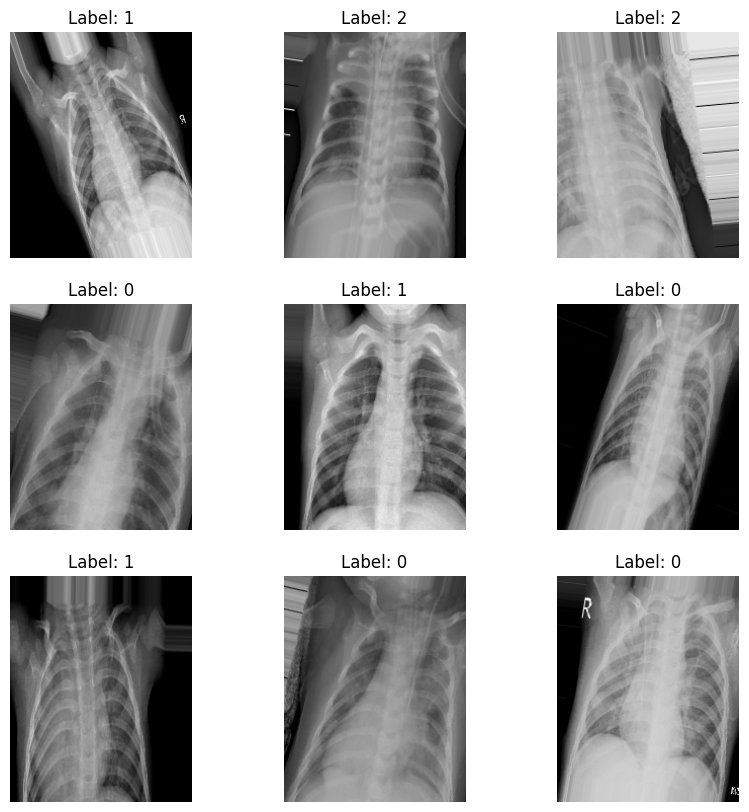

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy and assign it to the alias 'np'


# Λήψη ενός batch από το train_generator

sample_batch = next(train_generator)
images, labels = sample_batch

# Οπτικοποίηση 9 δειγμάτων εικόνας
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    predicted_class = np.argmax(labels[i])
    plt.title(f"Label: {predicted_class}")
#    plt.title(f"Label: {int(labels[i])}")
    plt.axis('off')
plt.show()


εδω ορίζεται ως μοντέλο το mobilenetv2 και το προετοιμάζει

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
img_height, img_width = 224, 180
batch_size = 32

# Load pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)  # Example: 3 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 180, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 186, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 90, 64)    │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 90, 64)    │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 90, 64)    │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 92, 64)    │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 45, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 45, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 45, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 45, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 45, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 45, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 45, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 45, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 45, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

εδω ξεκινάει η εκπαίδευση. μπορείτε να παίξετε με τις εποχές

In [2]:
# Create validation_generator using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Changed to 'sparse'
    subset='training'  # Specify subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Changed to 'sparse'
    subset='validation'  # Specify subset for validation data
)


# Εκπαίδευση του μοντέλου
epochs = 10

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1
)


NameError: name 'train_datagen' is not defined

δείχνει τις κύριες μετρικές

In [ ]:
# Αξιολόγηση στο validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 644ms/step - accuracy: 0.7532 - loss: 0.5873
Validation Loss: 0.5556488037109375
Validation Accuracy: 0.7674169540405273


γραφηματα

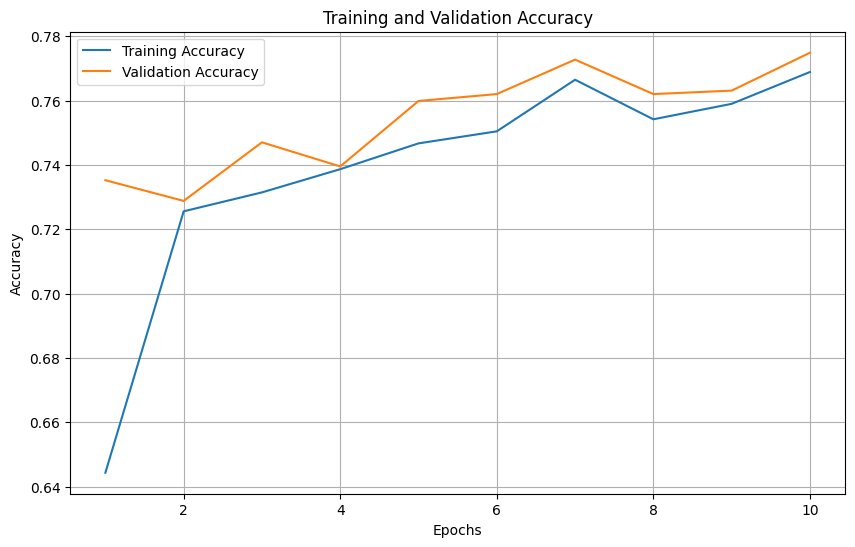

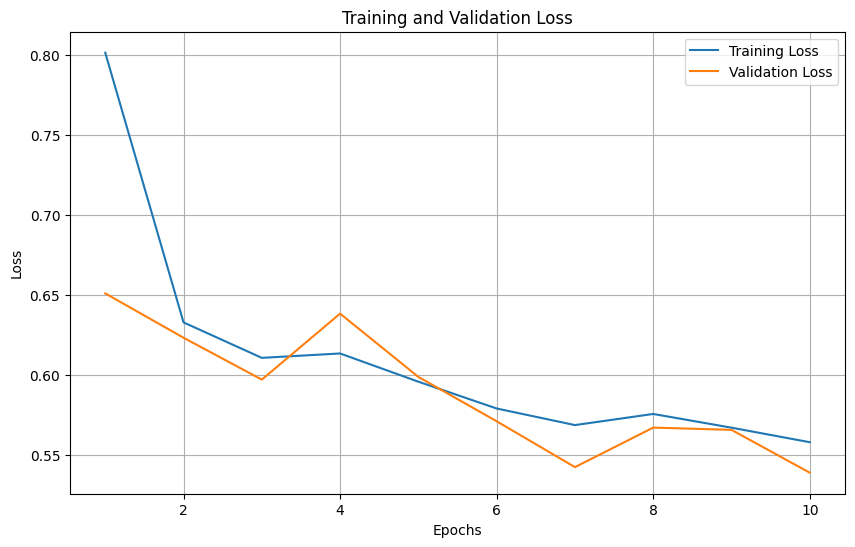

In [ ]:
import matplotlib.pyplot as plt

# Υποθέτουμε ότι έχετε το ιστορικό εκπαίδευσης
# από την εκπαίδευση του μοντέλου
# π.χ. history = model.fit(...)

# Ανάκτηση δεδομένων από το ιστορικό
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Αριθμός εποχών
epochs = range(1, len(acc) + 1)

# Γράφημα Ακρίβειας
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Γράφημα Απώλειας
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


σωζει το εκπαιδευμένο μοντέλο

In [ ]:
model.save('/content/drive/My Drive/ML102/pneumonia_MobiNet_adam_224x180.h5')


εδω ξεπαγωνει κάποια επίπεδα για βελτιστοποίηση. προαιρετικο

In [ ]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


εδω περνάει το συνολο των test ακτίνων και τις κατατάσει καταγράφοντας τις σε ένα αρχειο cvs. λογικά είναι αυτό που θα ανεβάζουμε στο kaggle


In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Διαδρομές
test_dir = "/content/drive/My Drive/ML102/test_images_root/"  # Ο φάκελος με τις test εικόνες
model_path = "/content/drive/My Drive/ML102/pneumonia_MobiNet_adam_224x180.h5"  # Αρχείο μοντέλου # Changed this line to include the full path
output_csv = "/content/drive/My Drive/ML102/test_predictions_adam224x180.csv"  # Όνομα αρχείου CSV


ppath = os.listdir(test_dir)

print(ppath)

model = load_model(model_path)

# Προετοιμασία των δεδομένων
img_height, img_width = 224, 180  # Το μέγεθος των εικόνων (πρέπει να ταιριάζει με το μέγεθος εκπαίδευσης)
batch_size = 32

# Δημιουργία ImageDataGenerator για τα test δεδομένα
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Κανονικοποίηση
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,  # Χωρίς ετικέτες, μόνο εικόνες
    shuffle=False  # Διατήρηση της σειράς των εικόνων
)

print(test_generator.samples)
print(test_generator.filenames)

# Προβλέψεις
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Λίστα με τα ονόματα των εικόνων
file_names = test_generator.filenames

# Δημιουργία DataFrame για το CSV
results = pd.DataFrame({
    "file_name": [os.path.basename(f) for f in file_names],
    "class_id": predicted_classes
})

# Αποθήκευση σε αρχείο CSV
results.to_csv(output_csv, index=False)

print(f"Οι προβλέψεις αποθηκεύτηκαν στο αρχείο {output_csv}")


['test_images.zip', 'test_images_all']


Found 1168 images belonging to 1 classes.
1168
['test_images_all/test_images/img_1005556732793955351.jpg', 'test_images_all/test_images/img_1013947992995844467.jpg', 'test_images_all/test_images/img_1037372824298815463.jpg', 'test_images_all/test_images/img_1037910048520457739.jpg', 'test_images_all/test_images/img_1046182996541873496.jpg', 'test_images_all/test_images/img_1055155538793908277.jpg', 'test_images_all/test_images/img_1056493789828791097.jpg', 'test_images_all/test_images/img_1063539320518541645.jpg', 'test_images_all/test_images/img_1067627733181002215.jpg', 'test_images_all/test_images/img_1069295317302009938.jpg', 'test_images_all/test_images/img_1082179150533558647.jpg', 'test_images_all/test_images/img_1084571077180415795.jpg', 'test_images_all/test_images/img_1085919836874816265.jpg', 'test_images_all/test_images/img_1089446545260563550.jpg', 'test_images_all/test_images/img_1102208210595046337.jpg', 'test_images_all/test_images/img_1123863876791783558.jpg', 'test_im